In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

import utils as u
from models import pentzer2014pow
from models.ML import terrain_MLP as tmlp
from visualization import multiline, papermode

papermode(plt, size=12)

In [2]:
ugv_name = "husky"
saved_path = Path("data") / "saved_models"
model_name = tmlp.TerrainMLPRegressor.model_name().lower()
figdir = u.get_figdir("summary", subdir=model_name)
model_name = tmlp.TerrainMLPRegressor.filename()
ugv_mdl_path = saved_path / model_name / ugv_name

In [3]:
# terrain_abbrs = u.import_terrain_abbrs_yaml(("Till", "Vegetal", "Asphalt", "Snow"))
terrain_abbrs = u.import_terrain_abbrs_yaml(("Sandy loam", "Asphalt", "Snow", "Flooring", "Ice"))
terrain_abbrs = {terr:[abbr for abbr in terr_abbrs if u.get_ugv(abbr) == "husky"] for terr, terr_abbrs in terrain_abbrs.items()}
# terrain_abbrs = u.import_terrain_abbrs_yaml()
abbrs = sorted([item for sublist in terrain_abbrs.values() for item in sublist])
# abbrs = [abbr for abbr in abbrs if u.get_ugv(abbr) == "husky"]

In [4]:
terrain_abbrs

{'sandy loam': ['H01',
  'H02',
  'H03',
  'H04',
  'H05',
  'H06',
  'H07',
  'H08',
  'H09',
  'H10',
  'H11',
  'H12',
  'H13',
  'H14'],
 'asphalt': ['H24', 'H25', 'H26', 'H27', 'H31', 'H35', 'H36'],
 'snow': ['H15',
  'H16',
  'H17',
  'H18',
  'H19',
  'H20',
  'H21',
  'H22',
  'H23',
  'H28',
  'H29',
  'H30',
  'H32',
  'H33',
  'H34',
  'H62',
  'H63',
  'H64',
  'H65',
  'H66',
  'H67',
  'H68',
  'H69',
  'H70',
  'H71',
  'H72',
  'H73'],
 'flooring': ['H39',
  'H40',
  'H41',
  'H42',
  'H43',
  'H44',
  'H45',
  'H46',
  'H47',
  'H48'],
 'ice': ['H49',
  'H50',
  'H51',
  'H52',
  'H53',
  'H54',
  'H55',
  'H56',
  'H57',
  'H58',
  'H59',
  'H60',
  'H61']}

In [5]:
dfs = {}
for abbr in abbrs:
    pentz_df = pentzer2014pow.open_model_df(abbr);
    dfs[abbr] = pentz_df
    dfs[abbr]["mass"] = pentz_df.meta.ugv_mass
    dfs[abbr]["terrain"] = u.get_terrain(abbr).lower()

In [6]:
terrain_instances = {
    terr: {abbr:len(dfs[abbr].dropna().index) for abbr in terr_abbrs}
    for terr, terr_abbrs in terrain_abbrs.items()
}

In [7]:
terrain_instances

{'sandy loam': {'H01': 60,
  'H02': 16,
  'H03': 30,
  'H04': 28,
  'H05': 325,
  'H06': 64,
  'H07': 276,
  'H08': 315,
  'H09': 244,
  'H10': 136,
  'H11': 194,
  'H12': 109,
  'H13': 81,
  'H14': 372},
 'asphalt': {'H24': 167,
  'H25': 21,
  'H26': 61,
  'H27': 203,
  'H31': 7,
  'H35': 10,
  'H36': 74},
 'snow': {'H15': 89,
  'H16': 2,
  'H17': 34,
  'H18': 167,
  'H19': 9,
  'H20': 42,
  'H21': 40,
  'H22': 45,
  'H23': 74,
  'H28': 105,
  'H29': 126,
  'H30': 8,
  'H32': 158,
  'H33': 158,
  'H34': 5,
  'H62': 183,
  'H63': 55,
  'H64': 189,
  'H65': 68,
  'H66': 19,
  'H67': 317,
  'H68': 242,
  'H69': 23,
  'H70': 274,
  'H71': 2,
  'H72': 55,
  'H73': 15},
 'flooring': {'H39': 146,
  'H40': 129,
  'H41': 163,
  'H42': 210,
  'H43': 106,
  'H44': 244,
  'H45': 1,
  'H46': 125,
  'H47': 49,
  'H48': 60},
 'ice': {'H49': 57,
  'H50': 38,
  'H51': 75,
  'H52': 36,
  'H53': 47,
  'H54': 187,
  'H55': 50,
  'H56': 123,
  'H57': 167,
  'H58': 149,
  'H59': 126,
  'H60': 77,
  'H61': 

In [8]:
# veloc = ("vx", "vy", "vz")
veloc = ("vx",)
accel_cor = ("ax_corr", "ay_corr", "az_corr")
posit = ("px", "py", "pz")
volts = ("V_L", "V_R")
wheel = ("vL", "vR")
morales = ("JS_sym", "JG")
amps = ("I_L", "I_R")

# cols_x = [
#     # "mass",
#     *veloc,
#     *accel_cor,
#     # *posit,
#     *volts,
#     *wheel,
#     *morales,
#     *amps,
# ]

cols_x = [
    *veloc,
    *accel_cor,
    *volts,
    *wheel,
    *morales,
    *amps,
]

cols_y = ["P_motion", "terrain"]

In [9]:
terrain_dfs = {}
for terr, terr_abbrs in terrain_abbrs.items():
    terr_dfs = [dfs[abbr] for abbr in terr_abbrs]
    terrain_dfs[terr] = pd.concat(terr_dfs, ignore_index=True)
    terrain_dfs[terr]["terrain"] = terr

terr_df = pd.concat(terrain_dfs.values(), ignore_index=True)
terr_df = terr_df[cols_x + cols_y].copy().dropna()

In [10]:
X = terr_df[cols_x].copy()
y = terr_df[cols_y].copy()
terrain_summary = y.terrain.value_counts()
terrains = [*terrain_dfs.keys()]
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [11]:
terrain_summary

ice           14849
flooring      13924
snow           9378
sandy loam     4347
asphalt        3695
Name: terrain, dtype: int64

Text(0.5, 0, 'Class')

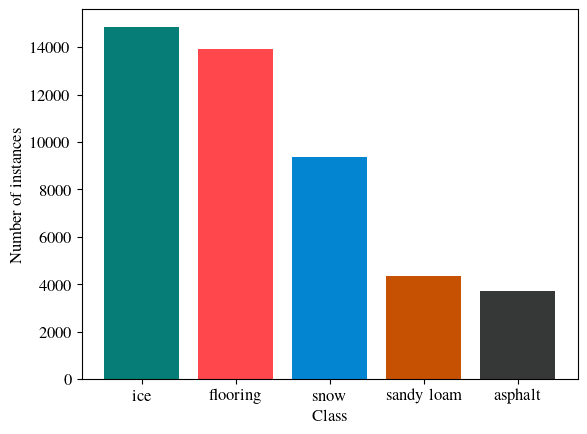

In [12]:
fig, ax = plt.subplots()
bar_colors = [u.COLORS[terrain] for terrain in terrain_summary.index]
ax.bar(terrain_summary.index, terrain_summary.values, color=bar_colors)
ax.set_ylabel("Number of instances")
ax.set_xlabel("Class")

Text(0.5, 0, 'Class')

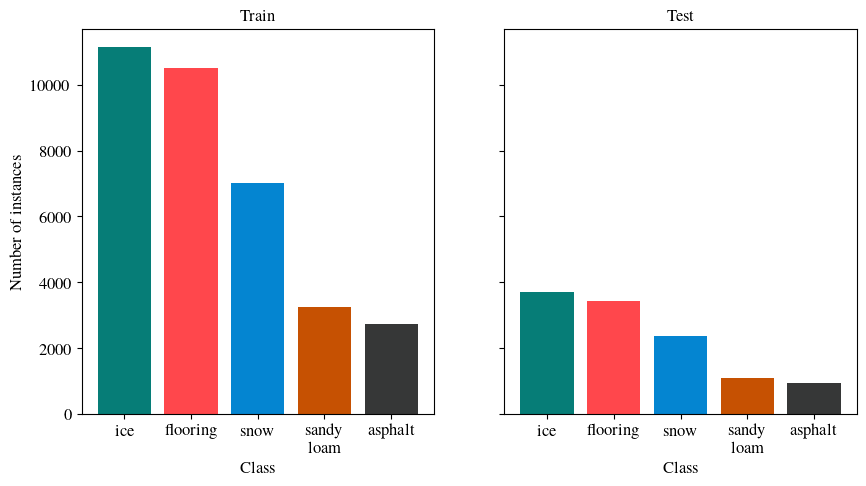

In [13]:
fig, [ax1,ax2] = plt.subplots(ncols=2, figsize=(10,5),sharey=True)
bar_colors = [u.COLORS[terrain] for terrain in terrain_summary.index]
summary_train = y_train.terrain.value_counts()
summary_test = y_test.terrain.value_counts()
bar_colors_train = [u.COLORS[terrain] for terrain in summary_train.index]
bar_colors_test = [u.COLORS[terrain] for terrain in summary_test.index]
ax1.bar([multiline(cl) for cl in summary_train.index], summary_train.values, color=bar_colors_train)
ax2.bar([multiline(cl) for cl in summary_test.index], summary_test.values, color=bar_colors_test)
ax1.set_ylabel("Number of instances")
ax1.set_title("Train")
ax2.set_title("Test")
ax1.set_xlabel("Class")
ax2.set_xlabel("Class")

# SMOTE

In [14]:
X = terr_df[cols_x].copy()
y = terr_df[cols_y].copy()
X.head()

vx   ax_corr   ay_corr   az_corr    V_L    V_R        vL  \
0  1.330750e-17 -1.564307  0.221547  0.404278  24.64  24.75  0.173228   
1  1.449107e-02 -0.925990  0.070359  0.013635  24.50  24.64  0.236220   
2  1.449107e-02 -0.563309  0.331343 -0.206924  24.67  24.67  0.236220   
3  4.979141e-02  0.773196 -0.895779  0.181370  24.92  24.85  0.236220   
4  9.149177e-02 -0.254895  0.262361  0.122963  24.82  24.82  0.236220   

         vR     JS_sym        JG    I_L   I_R  
0  0.173228  21.231214  0.346457  12.02  3.88  
1  0.236220  10.276489  0.472441  10.83  4.93  
2  0.236220   4.239833  0.472441   8.21  6.37  
3  0.236220   1.996587  0.472441   1.91  3.48  
4  0.236220   2.743064  0.472441   5.45  6.11

In [15]:
from collections import Counter
from imblearn.over_sampling import SMOTE

In [17]:
f"Original dataset shape {Counter(y.terrain)}"

"Original dataset shape Counter({'ice': 14849, 'flooring': 13924, 'snow': 9378, 'sandy loam': 4347, 'asphalt': 3695})"

In [20]:
sm = SMOTE()
X_res, y_res = sm.fit_resample(X, y.terrain)

In [22]:
f"Original dataset shape {Counter(y_res)}"

"Original dataset shape Counter({'sandy loam': 14849, 'asphalt': 14849, 'snow': 14849, 'flooring': 14849, 'ice': 14849})"